In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

In [3]:
import zipfile
import os

# Define the zip file path and extraction path
zip_file_path = r"C:\Users\Lenovo\OneDrive - Alexandria University\Desktop\Anaconda\Teeth DataSet.zip"
extract_path = r"C:\Users\Lenovo\OneDrive - Alexandria University\Desktop\Anaconda\Teeth DataSet 8"

# Create the extraction folder if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [5]:
import os
import shutil

# Paths
test_dir = r"C:\Users\Lenovo\OneDrive - Alexandria University\Desktop\Anaconda\Teeth DataSet 8\Teeth_Dataset\Testing"
selected_test_dir =r"C:\Users\Lenovo\OneDrive - Alexandria University\Desktop\Anaconda\Teeth DataSet 8\Teeth_Dataset\NewTesting"

# Create the new directory if it doesn't exist
if not os.path.exists(selected_test_dir):
    os.makedirs(selected_test_dir)

# List all folders in the test directory
all_folders = sorted([f for f in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, f))])

# Select the first 7 folders
selected_folders = all_folders[:7]

# Move the selected folders to the new directory
for folder in selected_folders:
    src = os.path.join(test_dir, folder)
    dst = os.path.join(selected_test_dir, folder)
    shutil.copytree(src, dst)

print(f"Selected folders: {selected_folders}")


Selected folders: ['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']


In [7]:
# Define image size and batch size
image_size = (150, 150)  # Example size, adjust as needed
batch_size = 32

# Data augmentation settings
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    #height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load data from directories
train_generator = train_datagen.flow_from_directory(
   r"C:\Users\Lenovo\OneDrive - Alexandria University\Desktop\Anaconda\Teeth DataSet 2\Teeth_Dataset\Training",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    r"C:\Users\Lenovo\OneDrive - Alexandria University\Desktop\Anaconda\Teeth DataSet 2\Teeth_Dataset\Validation",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    r"C:\Users\Lenovo\OneDrive - Alexandria University\Desktop\Anaconda\Teeth DataSet 2\Teeth_Dataset\NewTesting",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.


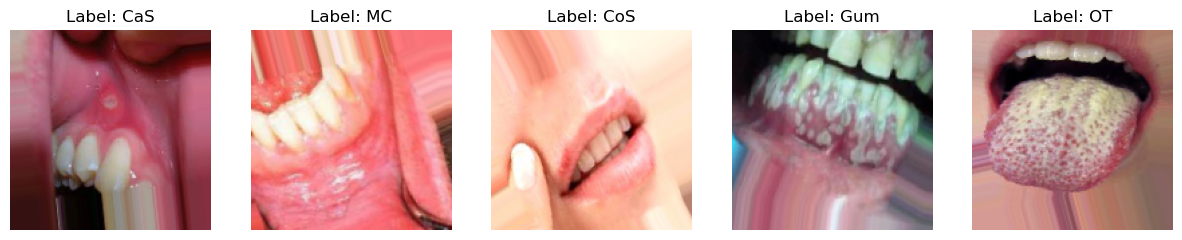

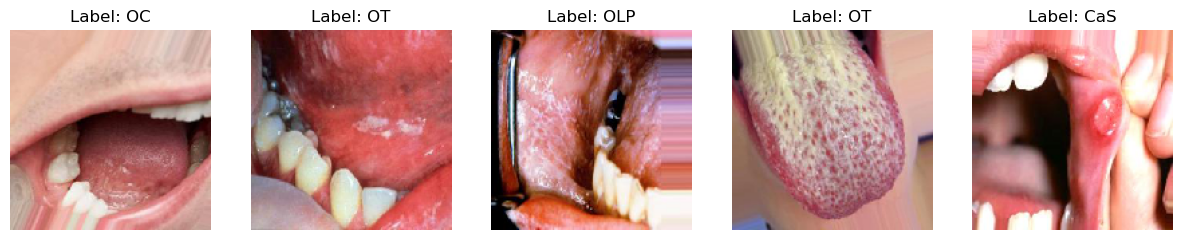

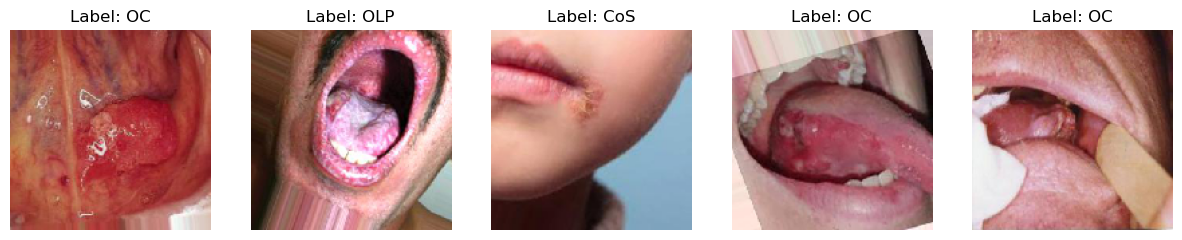

In [9]:
def plot_images(generator, num_images=5):
    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        image, label = next(generator)
        plt.subplot(1, num_images, i+1)
        plt.imshow(image[0])
        # Get the class index with the highest probability and use it to fetch the label
        predicted_class_index = label[0].argmax()
        predicted_class_label = list(generator.class_indices.keys())[list(generator.class_indices.values()).index(predicted_class_index)]
        plt.title(f"Label: {predicted_class_label}")
        plt.axis('off')
    plt.show()

# Visualize images from each set
plot_images(train_generator)
plot_images(val_generator)
plot_images(test_generator)

In [16]:
#def conv_block(x, filters, num_conv_layers):
#    for _ in range(num_conv_layers):
#        x = layers.Conv2D(filters, (3, 3), padding='same', activation='relu')(x)
#    x = layers.MaxPooling2D((2, 2))(x)
#    return x

#def vgg16_model(input_shape=(224, 224, 3), num_classes=7):
#    inputs = tf.keras.Input(shape=input_shape)

    # Convolutional layers
#    x = conv_block(inputs, 64, 2)
#    x = conv_block(x, 128, 2)
#    x = conv_block(x, 256, 3)
#    x = conv_block(x, 512, 3)
#    x = conv_block(x, 512, 3)

    # Fully connected layers
#    x = layers.Flatten()(x)
#    x = layers.Dense(4096, activation='relu')(x)
#    x = layers.Dropout(0.5)(x)
#    x = layers.Dense(4096, activation='relu')(x)
#    x = layers.Dropout(0.5)(x)
#    outputs = layers.Dense(num_classes, activation='softmax')(x)

#    model = models.Model(inputs, outputs)
#    return model

In [9]:
#model = vgg16_model(input_shape=(150, 150, 3), num_classes=7)

In [11]:
model = models.Sequential([
    # First Convolutional Block
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Second Convolutional Block
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten and Fully Connected Layers
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),  # Increased Dense layer size for more complexity
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),  # Increased Dense layer size for more complexity
    layers.Dropout(0.5),

    # Output Layer
    layers.Dense(7, activation='softmax')  # 7 classes for your teeth classification task
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      42,468,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 43,089,991 (164.38 MB)

 Trainable params: 43,089,991 (164.38 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(
    train_generator,  # Your training data generator
    epochs=50,
    validation_data=val_generator  # Your validation data generator
)

Epoch 1/50


C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


97/97 ━━━━━━━━━━━━━━━━━━━━ 55s 526ms/step - accuracy: 0.1774 - loss: 2.2905 - val_accuracy: 0.2665 - val_loss: 1.8062
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 52s 521ms/step - accuracy: 0.2196 - loss: 1.8847 - val_accuracy: 0.2315 - val_loss: 1.8439
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 52s 522ms/step - accuracy: 0.2649 - loss: 1.8199 - val_accuracy: 0.3337 - val_loss: 1.6784
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 52s 519ms/step - accuracy: 0.3262 - loss: 1.7370 - val_accuracy: 0.3716 - val_loss: 1.6379
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 52s 526ms/step - accuracy: 0.3485 - loss: 1.6942 - val_accuracy: 0.4232 - val_loss: 1.5257
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 53s 537ms/step - accuracy: 0.3988 - loss: 1.5868 - val_accuracy: 0.4504 - val_loss: 1.4476
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 53s 529ms/step - accuracy: 0.4113 - loss: 1.5427 - val_accuracy: 0.4874 - val_loss: 1.3402
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 50s 505ms/step - accuracy: 0.4567 - loss: 1.4856 - val_accuracy: 0.520

In [14]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.9236 - loss: 0.2139 
Test Accuracy: 0.9221789836883545
